In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [3]:
df=pd.read_csv(r"C:\Users\shras\Downloads\DBSCAN_Data.csv")
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


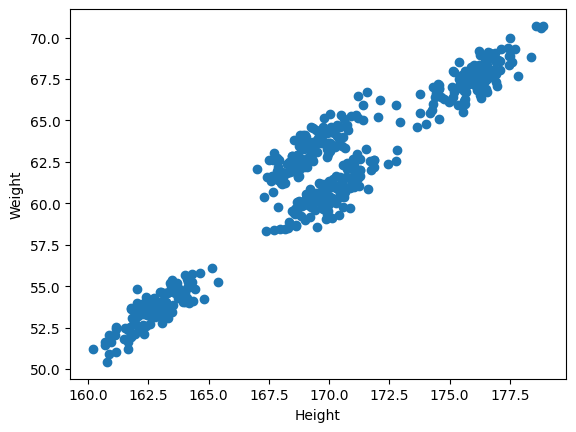

In [4]:
X=df['Height']
Y=df['Weight']
plt.scatter(X,Y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [5]:
def check_core_border_noise(df,eps,minpts,index):
    x=X[index]
    y=Y[index]
    temp=df[((np.abs(x-df['Height'])<=eps) & (np.abs(y-df['Weight'])<=eps))& (df.index != index)]

    if len(temp) >= minpts:
        return(temp.index,True,False,False) #core point (df,is_core,is_border,is_noise)
    
    elif (len(temp) < minpts) and len(temp) > 0:
        return (temp.index , False, True, False) #border pt
    
    elif len(temp) == 0:
        return (temp.index , False, False, True) #noise pt
    
def DBSCAN(df,eps,minpts):
    C=1
    current_stack=set()
    unvisited=list(df.index)
    clusters=[]
    while (len(unvisited)!=0):
        first_point=True
        current_stack.add(random.choice(unvisited))
        while len(current_stack) != 0:
            curr_idx = current_stack.pop()
            neigh_indexes, iscore, isborder, isnoise = check_core_border_noise(df,eps, minpts, curr_idx)
            if (isborder & first_point):
                #for first border point, label it aand its neighbours as noise 
                clusters.append((curr_idx, 0))
                clusters.extend(list(zip(neigh_indexes,[0 for _ in range(len(neigh_indexes))])))
                
                #label as visited
                unvisited.remove(curr_idx)
                unvisited = [e for e in unvisited if e not in neigh_indexes]

                continue
            unvisited.remove(curr_idx)
            neigh_indexes = set(neigh_indexes) & set(unvisited) #look at only unvisited points
            
            if iscore: #if current point is a core
                first_point = False
                
                clusters.append((curr_idx,C)) #assign to a cluster
                current_stack.update(neigh_indexes) #add neighbours to a stack

            elif isborder: #if current point is a border point
                clusters.append((curr_idx,C))
                
                continue

            elif isnoise: #if current point is noise
                clusters.append((curr_idx, 0))
                
                continue
                
        if not first_point:
            #increment cluster number
            C+=1
        
    return clusters
        

Text(0, 0.5, 'Weight')

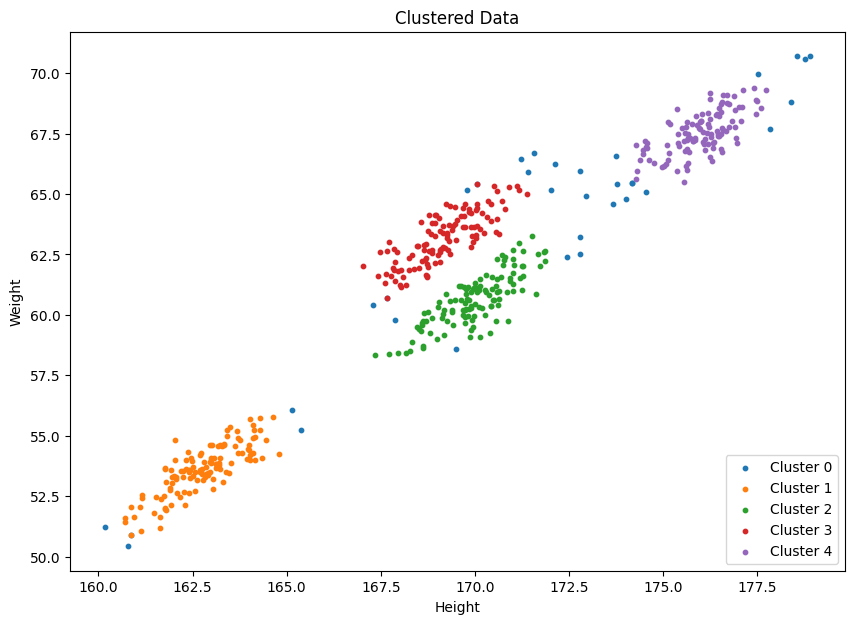

In [17]:
eps = 0.5
minPts = 3
clustered = DBSCAN(df,eps, minPts)

idx , cluster = list(zip(*clustered))
cluster_df = pd.DataFrame(clustered, columns = ["idx", "cluster"])

plt.figure(figsize=(10,7))
# np.unique(cluster)
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values], Y[cluster_df["idx"][cluster_df["cluster"] == clust].values], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right") #Cluster 0 is noise here
plt.title('Clustered Data')
plt.xlabel('Height')
plt.ylabel('Weight')